# Salário
## Nosso objetivo: 
###  Mostrar quantidade de indivíduos em suas diferenciação dos Salários, conseguir prever de acordo com o perfil da pessoa se ela terá um salário menor ou maior que a média salarial encontrada na base, usando o atributo salario.
#### Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression,SelectKBest,SelectPercentile
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Obtenção dos Dados

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IFES/BDII/CAGED_GV.csv',sep=';')
df

,saldo,idade,horascontratuais,indtrabintermitente,indtrabparcial,salario,indicadoraprendiz,month,year,estado,municipio,desc_subclasse,desc_classe,desc_grupo,desc_divisao,desc_secao,titulo_ocupacao,titulo_familia,titulo_subgrupo,titulo_subprincipal,titulo_grandegp,descricao,desc_instr,desc_sexo,desc_raca,desc_def
0,1,33.0,40,0,0,2784.0,0,1,2019,ES,Vitoria,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,INDÚSTRIAS EXTRATIVAS,Operador de transporte multimodal,Especialistas em log�stica de transportes,T�CNICOS EM TRANSPORTES (LOG�STICA),T�CNICOS DE N�VEL M�DIO EM SERVI�OS DE TRANSPO...,T�CNICOS DE NIVEL M�DIO,Admissão por primeiro,Médio Completo,Mulher,Branca,Não Deficiente
1,1,19.0,44,0,0,1045.0,0,1,2019,ES,Serra,APARELHAMENTO DE PLACAS E EXECUÇÃO DE TRABALHO...,APARELHAMENTO E OUTROS TRABALHOS EM PEDRAS,APARELHAMENTO DE PEDRAS E FABRICAÇÃO DE OUTROS...,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Servente de obras,Ajudantes de obras civis,AJUDANTES DE OBRAS,TRABALHADORES DA IND�STRIA EXTRATIVA E DA CONS...,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Completo,Homem,Parda,Não Deficiente
2,1,16.0,22,0,0,499.0,1,1,2019,ES,Serra,APARELHAMENTO DE PLACAS E EXECUÇÃO DE TRABALHO...,APARELHAMENTO E OUTROS TRABALHOS EM PEDRAS,APARELHAMENTO DE PEDRAS E FABRICAÇÃO DE OUTROS...,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Auxiliar de escrit�rio,"Agentes, assistentes e auxiliares administrativos","ESCRITUR�RIOS EM GERAL, AGENTES, ASSISTENTES E...",ESCRITUR�RIOS,TRABALHADORES DE SERVI�OS ADMINISTRATIVOS,Admissão por primeiro,Médio Incompleto,Mulher,Parda,Não Deficiente
3,1,19.0,44,0,0,1205.0,0,1,2019,ES,Serra,FABRICAÇÃO DE ESTRUTURAS PRÉ MOLDADAS DE CONCR...,"FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...","FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...",FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Alimentador de linha de produ��o,Alimentadores de linhas de produ��o,EMBALADORES E ALIMENTADORES DE PRODU��O,TRABALHADORES DE FUN��ES TRANSVERSAIS,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Incompleto,Homem,Parda,Não Deficiente
4,1,19.0,44,0,0,1205.0,0,1,2019,ES,Serra,FABRICAÇÃO DE ESTRUTURAS PRÉ MOLDADAS DE CONCR...,"FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...","FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...",FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Alimentador de linha de produ��o,Alimentadores de linhas de produ��o,EMBALADORES E ALIMENTADORES DE PRODU��O,TRABALHADORES DE FUN��ES TRANSVERSAIS,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Incompleto,Homem,Parda,Não Deficiente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724405,-1,51.0,44,0,0,7.8,0,12,2020,ES,Serra,INSTALAÇÃO E MANUTENÇÃO ELÉTRICA,INSTALAÇÕES ELÉTRICAS,"INSTALAÇÕES ELÉTRICAS, HIDRÁULICAS E OUTRAS IN...",SERVIÇOS ESPECIALIZADOS PARA CONSTRUÇÃO,CONSTRUÇÃO,Caldeireiro (chapas de ferro e a�o),Trabalhadores de caldeiraria e serralheria,"TRABALHADORES DE MONTAGEM DE TUBULA��ES, ESTRU...",TRABALHADORES DA TRANSFORMA��O DE METAIS E DE ...,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Término contrato trab,Médio Completo,Homem,Preta,Não Deficiente
724406,-1,39.0,42,0,0,2500.0,0,12,2020,ES,Serra,CONSTRUÇÃO DE EDIFÍCIOS,CONSTRUÇÃO DE EDIFÍCIOS,CONSTRUÇÃO DE EDIFÍCIOS,CONSTRUÇÃO DE EDIFÍCIOS,CONSTRUÇÃO,Analista de recursos humanos,Profissionais de recursos humanos,PROFISSIONAIS DE ORGANIZA��O E ADMINISTRA��O D...,PROFISSIONAIS DAS CI�NCIAS SOCIAIS E HUMANAS,PROFISSIONAIS DAS CI�NCIAS E DAS ARTES,Desligamento por Acor,Superior Completo,Mulher,Não informada,Não Deficiente
724407,-1,36.0,6,0,0,0.0,0,12,2020,ES,Vitoria,ENSINO FUNDAMENTAL,ENSINO FUNDAMENTAL,EDUCAÇÃO INFANTIL E ENSINO FUNDAMENTAL,EDUCA

In [ ]:
best_df=df
stat_data = best_df.describe(include=[object]).T
stat_data['nulos']= pd.DataFrame(best_df.isnull().sum())
stat_data['percent_nulos']= pd.DataFrame(best_df.isna().mean().round(4) * 100)
stat_data["type"] = pd.Series(best_df.dtypes)
stat_data_objetct=stat_data
stat_data_objetct

,count,unique,top,freq,nulos,percent_nulos,type
estado,724410,1,ES,724410,0,0.00,object
municipio,724410,5,Serra,242650,0,0.00,object
desc_subclasse,719720,925,"COMÉRCIO VAREJISTA DE MERCADORIAS EM GERAL, CO...",29517,4690,0.65,object
desc_classe,719720,541,RESTAURANTES E OUTROS ESTABELECIMENTOS DE SERV...,34751,4690,0.65,object
desc_grupo,719720,252,COMÉRCIO VAREJISTA NÃO-ESPECIALIZADO,37236,4690,0.65,object
desc_divisao,719720,85,COMÉRCIO VAREJISTA,135157,4690,0.65,object
desc_secao,719720,21,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...,194741,4690,0.65,object
titulo_ocupacao,724192,1728,Vendedor de com�rcio varejista,46345,218,0.03,object
titulo_familia,724192,539,Operadores do com�rcio em lojas e mercados,86467,218,0.03,object
titulo_subgrupo,724192,182,VENDEDORES E DEMONSTRADORES,86467,218,0.03,object


In [ ]:
best_df=df
stat_data = best_df.describe(include=[np.number]).T
stat_data['nulos']= pd.DataFrame(best_df.isnull().sum())
stat_data['percent_nulos']= pd.DataFrame(df.isna().mean().round(4) * 100)
stat_data["type"] = pd.Series(df.dtypes)
stat_data["median"] = pd.Series(df.median(numeric_only=True))
stat_data_numbers=stat_data
stat_data_numbers

,count,mean,std,min,25%,50%,75%,max,nulos,percent_nulos,type,median
saldo,724410.0,0.019793,0.999805,-1.0,-1.0,1.0,1.0,1.0,0,0.0,int64,1.0
idade,724409.0,32.794780,10.842764,11.0,24.0,31.0,40.0,97.0,1,0.0,float64,31.0
horascontratuais,724410.0,40.664893,9.176717,0.0,44.0,44.0,44.0,99.0,0,0.0,int64,44.0
indtrabintermitente,724410.0,0.029342,0.355503,0.0,0.0,0.0,0.0,9.0,0,0.0,int64,0.0
indtrabparcial,724410.0,0.072720,0.766386,0.0,0.0,0.0,0.0,9.0,0,0.0,int64,0.0
salario,724409.0,1696.471602,11658.109633,0.0,1103.0,1208.2,1644.1,3520000.0,1,0.0,float64,1208.2
indicadoraprendiz,724410.0,0.040044,0.369109,0.0,0.0,0.0,0.0,9.0,0,0.0,int64,0.0
month,724410.0,6.446470,3.552630,1.0,3.0,7.0,10.0,12.0,0,0.0,int64,7.0
year,724410.0,2019.473656,0.499306,2019.0,2019.0,2019.0,2020.0,2020.0,0,0.0,int64,2019.0


Usaremos a média salarias de R$ 1.200

#### Análise de Nulos

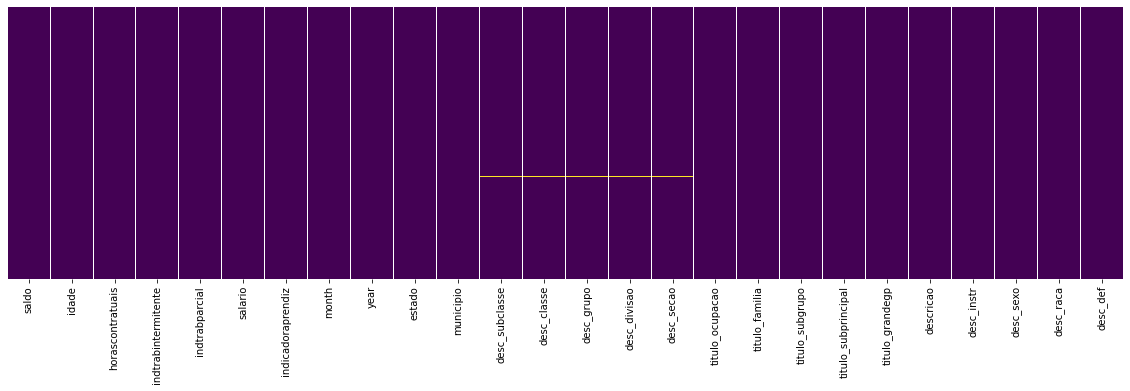

In [ ]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis',
           ax=ax)

#### Preencher com base na moda

In [ ]:
mode_sexo = df['desc_sexo'].mode()[0]
mode_idade = df['idade'].mode()[0]
mode_raca = df['desc_raca'].mode()[0]
mode_instr = df['desc_instr'].mode()[0]
mode_def = df['desc_def'].mode()[0]
mode_sal = df['salario'].mode()[0]
mode_ocupacao = df['titulo_ocupacao'].mode()[0]
print(mode_instr)
print(mode_sexo)
print(mode_idade)
print(mode_raca)
print(mode_def)
print(mode_sal)
print(mode_ocupacao)

Médio Completo
Homem
25.0
Parda
Não Deficiente
1107.0
Vendedor de com�rcio varejista


In [ ]:
#Preenchendo valores nulos com moda (categorica)
df['desc_sexo'] = df['desc_sexo'].fillna(mode_sexo)
df['salario'] = df['salario'].fillna(mode_sal)
df['idade'] = df['idade'].fillna(mode_idade)
df['desc_raca'] = df['desc_raca'].fillna(mode_raca)
df['desc_def'] = df['desc_def'].fillna(mode_raca)
df['desc_instr'] = df['desc_instr'].fillna(mode_instr)

In [ ]:
#Removendo linhas com valores inexistentes
df = df.dropna(how='any')

#### Verificando resultado

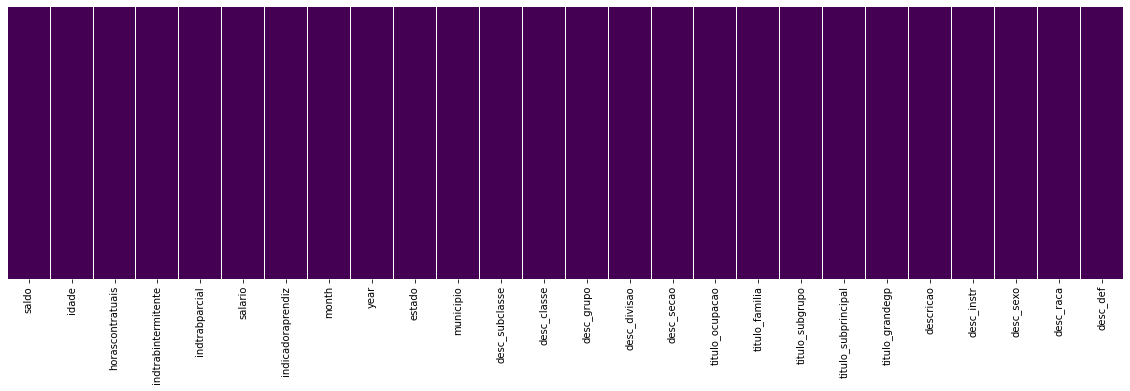

In [ ]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis',
           ax=ax)

# Transformação de dados

#### Categorizando numericamente os dados

In [ ]:
import sys
df['class_salario']=pd.cut(df['salario'], bins=[0, 1200, sys.maxsize], labels=[0, 1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.preprocessing import LabelEncoder
sexo_make = LabelEncoder()
df["desc_sexo_code"] = sexo_make.fit_transform(df["desc_sexo"])
secao_make = LabelEncoder()
df["desc_secao_code"] = secao_make.fit_transform(df["desc_secao"])
raca_make = LabelEncoder()
df["desc_raca_code"] = raca_make.fit_transform(df["desc_raca"])
instr_make = LabelEncoder()
df["desc_instr_code"] = instr_make.fit_transform(df["desc_instr"])
def_make = LabelEncoder()
df["def_code"] = def_make.fit_transform(df["desc_def"])
estado_make = LabelEncoder()
df["estado_code"] = estado_make.fit_transform(df["estado"])
municipio_make = LabelEncoder()
df["municipio_code"] = municipio_make.fit_transform(df["municipio"])
df.columns
ocupacao_make = LabelEncoder()
df["ocupacao_code"] = ocupacao_make.fit_transform(df["titulo_ocupacao"])
df.columns
print(sexo_make.classes_)
print(raca_make.classes_)
print(def_make.classes_)
print(instr_make.classes_)
print(secao_make.classes_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

['Homem' 'Mulher']
['Amarela' 'Branca' 'Indígena' 'Não Identificado' 'Não informada' 'Parda'
 'Preta']
['Auditiva' 'Física' 'Intelectual (Mental)' 'Múltipla' 'Não Deficiente'
 'Não Identificado' 'Reabilitado' 'Visual']
['5ª Completo Fundamental' '6ª a 9ª Fundamental' 'Analfabeto'
 'Até 5ª Incompleto' 'Doutorado' 'Fundamental Completo' 'Mestrado'
 'Médio Completo' 'Médio Incompleto' 'Pós-Graduação completa'
 'Superior Completo' 'Superior Incompleto']
['ADMINISTRAÇÃO PÚBLICA, DEFESA E SEGURIDADE SOCIAL'
 'AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PESCA E AQÜICULTURA'
 'ALOJAMENTO E ALIMENTAÇÃO' 'ARTES, CULTURA, ESPORTE E RECREAÇÃO'
 'ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES'
 'ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS RELACIONADOS'
 'ATIVIDADES IMOBILIÁRIAS'
 'ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS'
 'COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS' 'CONSTRUÇÃO'
 'EDUCAÇÃO' 'ELETRICIDADE E GÁS' 'INDÚSTRIAS DE TRANSFORMAÇÃO'
 'INDÚSTRIAS EXTRATIVAS' '

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Categorizando o Target

In [ ]:
df_label_encoder = df.copy()
target_make = LabelEncoder()
df.insert (6, "class_salario_target", target_make.fit_transform(df["class_salario"]))

# Grafico de visão geral

In [ ]:
sns.pairplot(df)

In [ ]:
df

,saldo,idade,horascontratuais,indtrabintermitente,indtrabparcial,salario,class_salario_target,indicadoraprendiz,month,year,estado,municipio,desc_subclasse,desc_classe,desc_grupo,desc_divisao,desc_secao,titulo_ocupacao,titulo_familia,titulo_subgrupo,titulo_subprincipal,titulo_grandegp,descricao,desc_instr,desc_sexo,desc_raca,desc_def,class_salario,desc_sexo_code,desc_secao_code,desc_raca_code,desc_instr_code,def_code,estado_code,municipio_code,ocupacao_code
0,1,33.0,40,0,0,2784.0,1,0,1,2019,ES,Vitoria,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,EXTRAÇÃO DE PETRÓLEO E GÁS NATURAL,INDÚSTRIAS EXTRATIVAS,Operador de transporte multimodal,Especialistas em log�stica de transportes,T�CNICOS EM TRANSPORTES (LOG�STICA),T�CNICOS DE N�VEL M�DIO EM SERVI�OS DE TRANSPO...,T�CNICOS DE NIVEL M�DIO,Admissão por primeiro,Médio Completo,Mulher,Branca,Não Deficiente,1,1,13,1,7,4,0,4,1151
1,1,19.0,44,0,0,1045.0,0,0,1,2019,ES,Serra,APARELHAMENTO DE PLACAS E EXECUÇÃO DE TRABALHO...,APARELHAMENTO E OUTROS TRABALHOS EM PEDRAS,APARELHAMENTO DE PEDRAS E FABRICAÇÃO DE OUTROS...,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Servente de obras,Ajudantes de obras civis,AJUDANTES DE OBRAS,TRABALHADORES DA IND�STRIA EXTRATIVA E DA CONS...,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Completo,Homem,Parda,Não Deficiente,0,0,12,5,7,4,0,1,1411
2,1,16.0,22,0,0,499.0,0,1,1,2019,ES,Serra,APARELHAMENTO DE PLACAS E EXECUÇÃO DE TRABALHO...,APARELHAMENTO E OUTROS TRABALHOS EM PEDRAS,APARELHAMENTO DE PEDRAS E FABRICAÇÃO DE OUTROS...,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Auxiliar de escrit�rio,"Agentes, assistentes e auxiliares administrativos","ESCRITUR�RIOS EM GERAL, AGENTES, ASSISTENTES E...",ESCRITUR�RIOS,TRABALHADORES DE SERVI�OS ADMINISTRATIVOS,Admissão por primeiro,Médio Incompleto,Mulher,Parda,Não Deficiente,0,1,12,5,8,4,0,1,140
3,1,19.0,44,0,0,1205.0,1,0,1,2019,ES,Serra,FABRICAÇÃO DE ESTRUTURAS PRÉ MOLDADAS DE CONCR...,"FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...","FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...",FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Alimentador de linha de produ��o,Alimentadores de linhas de produ��o,EMBALADORES E ALIMENTADORES DE PRODU��O,TRABALHADORES DE FUN��ES TRANSVERSAIS,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Incompleto,Homem,Parda,Não Deficiente,1,0,12,5,8,4,0,1,52
4,1,19.0,44,0,0,1205.0,1,0,1,2019,ES,Serra,FABRICAÇÃO DE ESTRUTURAS PRÉ MOLDADAS DE CONCR...,"FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...","FABRICAÇÃO DE ARTEFATOS DE CONCRETO, CIMENTO, ...",FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Alimentador de linha de produ��o,Alimentadores de linhas de produ��o,EMBALADORES E ALIMENTADORES DE PRODU��O,TRABALHADORES DE FUN��ES TRANSVERSAIS,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Incompleto,Homem,Parda,Não Deficiente,1,0,12,5,8,4,0,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724404,1,18.0,44,0,0,1188.3,0,0,12,2020,ES,Vila Velha,"COMÉRCIO VAREJISTA DE MERCADORIAS EM GERAL, CO...","COMÉRCIO VAREJISTA DE MERCADORIAS EM GERAL, CO...",COMÉRCIO VAREJISTA NÃO-ESPECIALIZADO,COMÉRCIO VAREJISTA,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...,Operador de caixa,Caixas e bilheteiros (exceto caixa de banco),"CAIXAS, BILHETEIROS E AFINS",TRABALHADORES DE ATENDIMENTO AO P�BLICO,TRABALHADORES DE SERVI�OS ADMINISTRATIVOS,Admissão por reempreg,Médio Completo,Mulher,Não informada,Não Deficiente,0,1,8,4,7,4,0,3,996
724405,-1,51.0,44,0,0,7.8,0,0,12,2020,ES,Serra,INSTALAÇÃO E MANUTENÇÃO ELÉTRICA,INSTALAÇÕES ELÉTRICAS,"INSTALAÇÕES ELÉTRICAS, HIDRÁULICAS E OUTRAS IN...",SERVIÇOS ESPECIALIZADOS PARA CONSTRUÇÃO,CONSTRUÇÃO,Caldeireiro (ch

# Balanceando dataset

In [ ]:
target = 'class_salario'
count_class_0, count_class_1 = df[target].value_counts()
df[target].value_counts()

1    370181
0    333448
Name: class_salario, dtype: int64

In [ ]:
df_class_0 = df[df[target] == 0]
df_class_1 = df[df[target] == 1]

#### Over-sampling
##### Unindo registros sampler (classe1) e registros da classe 5

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True,random_state=2)
df_class_1_over

,saldo,idade,horascontratuais,indtrabintermitente,indtrabparcial,salario,class_salario_target,indicadoraprendiz,month,year,estado,municipio,desc_subclasse,desc_classe,desc_grupo,desc_divisao,desc_secao,titulo_ocupacao,titulo_familia,titulo_subgrupo,titulo_subprincipal,titulo_grandegp,descricao,desc_instr,desc_sexo,desc_raca,desc_def,class_salario,desc_sexo_code,desc_secao_code,desc_raca_code,desc_instr_code,def_code,estado_code,municipio_code,ocupacao_code
690029,1,47.0,44,0,0,1265.0,1,0,11,2020,ES,Vitoria,LIMPEZA EM PRÉDIOS E EM DOMICÍLIOS,LIMPEZA EM PRÉDIOS E EM DOMICÍLIOS,ATIVIDADES DE LIMPEZA,SERVIÇOS PARA EDIFÍCIOS E ATIVIDADES PAISAGÍST...,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,Faxineiro,Trabalhadores nos servi�os de manuten��o de e...,"TRABALHADORES NOS SERVI�OS DE ADMINISTRA��O, C...",TRABALHADORES DOS SERVI�OS,"TRABALHADORES DOS SERVI�OS, VENDEDORES DO COM�...",Admissão por reempreg,Médio Completo,Mulher,Parda,Não Deficiente,1,1,4,5,7,4,0,4,578
201243,-1,36.0,44,0,0,4384.0,1,0,7,2019,ES,Serra,INSTALAÇÃO DE MÁQUINAS E EQUIPAMENTOS INDUSTRIAIS,INSTALAÇÃO DE MÁQUINAS E EQUIPAMENTOS INDUSTRIAIS,INSTALAÇÃO DE MÁQUINAS E EQUIPAMENTOS,"MANUTENÇÃO, REPARAÇÃO E INSTALAÇÃO DE MÁQUINAS...",INDÚSTRIAS DE TRANSFORMAÇÃO,Supervisor de or�amento,"Supervisores de servi�os financeiros, de c�mbi...",SUPERVISORES DE SERVI�OS ADMINISTRATIVOS (Exce...,ESCRITUR�RIOS,TRABALHADORES DE SERVI�OS ADMINISTRATIVOS,Desligamento por demi,Superior Completo,Homem,Parda,Não Deficiente,1,0,12,5,10,4,0,1,1475
414167,1,31.0,46,0,0,1340.7,1,0,1,2020,ES,Vila Velha,"TRANSPORTE RODOVIÁRIO DE CARGA, EXCETO PRODUTO...",TRANSPORTE RODOVIÁRIO DE CARGA,TRANSPORTE RODOVIÁRIO DE CARGA,TRANSPORTE TERRESTRE,"TRANSPORTE, ARMAZENAGEM E CORREIO",Motorista de furg�o ou ve�culo similar,Motoristas de ve�culos de pequeno e m�dio porte,CONDUTORES DE VE�CULOS E OPERADORES DE EQUIPAM...,TRABALHADORES DE FUN��ES TRANSVERSAIS,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por reempreg,Médio Completo,Homem,Branca,Não Deficiente,1,0,19,1,7,4,0,3,928
191164,1,18.0,44,0,0,1207.0,1,0,7,2019,ES,Cariacica,COMÉRCIO VAREJISTA DE ARTIGOS DO VESTUÁRIO E A...,COMÉRCIO VAREJISTA DE ARTIGOS DO VESTUÁRIO E A...,COMÉRCIO VAREJISTA DE PRODUTOS NOVOS NÃO ESPEC...,COMÉRCIO VAREJISTA,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...,Assistente de vendas,Especialistas em promo��o de produtos e vendas,T�CNICOS DE NIVEL M�DIO EM OPERA��ES COMERCIAIS,T�CNICOS DE NIVEL M�DIO NAS CI�NCIAS ADMINISTR...,T�CNICOS DE NIVEL M�DIO,Admissão por reempreg,Médio Completo,Mulher,Branca,Não Deficiente,1,1,8,1,7,4,0,0,115
169576,1,30.0,36,0,0,1298.0,1,0,6,2019,ES,Vila Velha,ATIVIDADES DE ATENDIMENTO EM PRONTO SOCORRO E ...,ATIVIDADES DE ATENDIMENTO HOSPITALAR,ATIVIDADES DE ATENDIMENTO HOSPITALAR,ATIVIDADES DE ATENÇÃO À SAÚDE HUMANA,SAÚDE HUMANA E SERVIÇOS SOCIAIS,T�cnico de enfermagem,T�cnicos e auxiliares de enfermagem,T�CNICOS DA CI�NCIA DA SA�DE HUMANA,T�CNICOS DE N�VEL M�DIO DAS CI�NCIAS BIOL�GICA...,T�CNICOS DE NIVEL M�DIO,Admissão por reempreg,Médio Completo,Homem,Branca,Não Deficiente,1,0,17,1,7,4,0,3,1594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156656,1,53.0,44,0,0,1734.0,1,0,6,2019,ES,Vitoria,"MANUTENÇÃO E REPARAÇÃO DE TANQUES, RESERVATÓRI...","MANUTENÇÃO E REPARAÇÃO DE TANQUES, RESERVATÓRI...",MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS E EQUIPAMENTOS,"MANUTENÇÃO, REPARAÇÃO E INSTALAÇÃO DE MÁQUINAS...",INDÚSTRIAS DE TRANSFORMAÇÃO,Pintor de estruturas met�licas,"Trabalhadores da pintura de equipamentos, ve�c...",TRABALHADORES DE TRATAMENTO T�RMICO E DE SUPER...,TRABALHADORES DA TRANSFORMA��O DE METAIS E DE ...,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por reempreg,6ª a 9ª Fundamental,Homem,Parda,Não Deficiente,1,0,12,5,1,4,0,4,1210
674991,-1,39.0,44,0,0,1980.0,1,0,11,2020,ES,Vitoria,FABRICAÇÃO DE ESQUADRIAS DE METAL,FABRICAÇÃO DE ESQUADRIAS DE METAL,FABRICAÇÃO DE ESTRUTURA

In [ ]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over

,saldo,idade,horascontratuais,indtrabintermitente,indtrabparcial,salario,class_salario_target,indicadoraprendiz,month,year,estado,municipio,desc_subclasse,desc_classe,desc_grupo,desc_divisao,desc_secao,titulo_ocupacao,titulo_familia,titulo_subgrupo,titulo_subprincipal,titulo_grandegp,descricao,desc_instr,desc_sexo,desc_raca,desc_def,class_salario,desc_sexo_code,desc_secao_code,desc_raca_code,desc_instr_code,def_code,estado_code,municipio_code,ocupacao_code
1,1,19.0,44,0,0,1045.0,0,0,1,2019,ES,Serra,APARELHAMENTO DE PLACAS E EXECUÇÃO DE TRABALHO...,APARELHAMENTO E OUTROS TRABALHOS EM PEDRAS,APARELHAMENTO DE PEDRAS E FABRICAÇÃO DE OUTROS...,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Servente de obras,Ajudantes de obras civis,AJUDANTES DE OBRAS,TRABALHADORES DA IND�STRIA EXTRATIVA E DA CONS...,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por primeiro,Médio Completo,Homem,Parda,Não Deficiente,0,0,12,5,7,4,0,1,1411
2,1,16.0,22,0,0,499.0,0,1,1,2019,ES,Serra,APARELHAMENTO DE PLACAS E EXECUÇÃO DE TRABALHO...,APARELHAMENTO E OUTROS TRABALHOS EM PEDRAS,APARELHAMENTO DE PEDRAS E FABRICAÇÃO DE OUTROS...,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Auxiliar de escrit�rio,"Agentes, assistentes e auxiliares administrativos","ESCRITUR�RIOS EM GERAL, AGENTES, ASSISTENTES E...",ESCRITUR�RIOS,TRABALHADORES DE SERVI�OS ADMINISTRATIVOS,Admissão por primeiro,Médio Incompleto,Mulher,Parda,Não Deficiente,0,1,12,5,8,4,0,1,140
6,1,15.0,20,0,0,499.0,0,1,1,2019,ES,Viana,FABRICAÇÃO DE ARTIGOS DE VIDRO,FABRICAÇÃO DE ARTIGOS DE VIDRO,FABRICAÇÃO DE VIDRO E DE PRODUTOS DO VIDRO,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Assistente administrativo,"Agentes, assistentes e auxiliares administrativos","ESCRITUR�RIOS EM GERAL, AGENTES, ASSISTENTES E...",ESCRITUR�RIOS,TRABALHADORES DE SERVI�OS ADMINISTRATIVOS,Admissão por primeiro,Médio Incompleto,Mulher,Parda,Não Deficiente,0,1,12,5,8,4,0,2,109
7,1,14.0,20,0,0,499.0,0,1,1,2019,ES,Serra,FABRICAÇÃO DE ARTIGOS DE VIDRO,FABRICAÇÃO DE ARTIGOS DE VIDRO,FABRICAÇÃO DE VIDRO E DE PRODUTOS DO VIDRO,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Assistente administrativo,"Agentes, assistentes e auxiliares administrativos","ESCRITUR�RIOS EM GERAL, AGENTES, ASSISTENTES E...",ESCRITUR�RIOS,TRABALHADORES DE SERVI�OS ADMINISTRATIVOS,Admissão por primeiro,6ª a 9ª Fundamental,Mulher,Preta,Não Deficiente,0,1,12,6,1,4,0,1,109
8,1,15.0,20,0,0,499.0,0,1,1,2019,ES,Serra,FABRICAÇÃO DE ARTIGOS DE VIDRO,FABRICAÇÃO DE ARTIGOS DE VIDRO,FABRICAÇÃO DE VIDRO E DE PRODUTOS DO VIDRO,FABRICAÇÃO DE PRODUTOS DE MINERAIS NÃO-METÁLICOS,INDÚSTRIAS DE TRANSFORMAÇÃO,Assistente administrativo,"Agentes, assistentes e auxiliares administrativos","ESCRITUR�RIOS EM GERAL, AGENTES, ASSISTENTES E...",ESCRITUR�RIOS,TRABALHADORES DE SERVI�OS ADMINISTRATIVOS,Admissão por primeiro,6ª a 9ª Fundamental,Mulher,Preta,Não Deficiente,0,1,12,6,1,4,0,1,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156656,1,53.0,44,0,0,1734.0,1,0,6,2019,ES,Vitoria,"MANUTENÇÃO E REPARAÇÃO DE TANQUES, RESERVATÓRI...","MANUTENÇÃO E REPARAÇÃO DE TANQUES, RESERVATÓRI...",MANUTENÇÃO E REPARAÇÃO DE MÁQUINAS E EQUIPAMENTOS,"MANUTENÇÃO, REPARAÇÃO E INSTALAÇÃO DE MÁQUINAS...",INDÚSTRIAS DE TRANSFORMAÇÃO,Pintor de estruturas met�licas,"Trabalhadores da pintura de equipamentos, ve�c...",TRABALHADORES DE TRATAMENTO T�RMICO E DE SUPER...,TRABALHADORES DA TRANSFORMA��O DE METAIS E DE ...,TRABALHADORES DA PRODU��O DE BENS E SERVI�OS I...,Admissão por reempreg,6ª a 9ª Fundamental,Homem,Parda,Não Deficiente,1,0,12,5,1,4,0,4,1210
674991,-1,39.0,44,0,0,1980.0,1,0,11,2020,ES,Vitoria,FABRICAÇÃO DE ESQUADRIAS DE METAL,FABRICAÇÃO DE ESQUADRIAS DE METAL,FABRICAÇÃO DE ESTRUTURAS METÁLICAS E OBRAS DE ...,"FABRICAÇÃO DE PRODUTOS DE METAL, EXCETO MÁQUIN...",INDÚSTRIAS DE TRA

In [ ]:
df_test_over.columns

Index(['saldo', 'idade', 'horascontratuais', 'indtrabintermitente',
       'indtrabparcial', 'salario', 'class_salario_target',
       'indicadoraprendiz', 'month', 'year', 'estado', 'municipio',
       'desc_subclasse', 'desc_classe', 'desc_grupo', 'desc_divisao',
       'desc_secao', 'titulo_ocupacao', 'titulo_familia', 'titulo_subgrupo',
       'titulo_subprincipal', 'titulo_grandegp', 'descricao', 'desc_instr',
       'desc_sexo', 'desc_raca', 'desc_def', 'class_salario', 'desc_sexo_code',
       'desc_secao_code', 'desc_raca_code', 'desc_instr_code', 'def_code',
       'estado_code', 'municipio_code', 'ocupacao_code'],
      dtype='object')

# Seleção de Características

In [ ]:
initial_selection = df_test_over[['idade', 'desc_secao_code', 'municipio_code', 'class_salario', 'class_salario_target']]

In [ ]:
initial_selection.columns[:-2]

Index(['idade', 'desc_secao_code', 'municipio_code'], dtype='object')

In [ ]:
df = initial_selection
target_number = 'class_salario_target'
print("""NAO SERAO UTILIZADOS: 
""",df.columns[:-2])
lista_drop_atributes = df.columns[-2:]
X=df.drop(lista_drop_atributes,axis=1)
y=df[target]

print("""

==> SERAO UTILIZADOS \n ==> Features %s \n ==> target %s """ %(list(df.columns[:-2]),target))
lista_drop_atributes = df.columns[:-1]

NAO SERAO UTILIZADOS: 
 Index(['idade', 'desc_secao_code', 'municipio_code'], dtype='object')


==> SERAO UTILIZADOS 
 ==> Features ['idade', 'desc_secao_code', 'municipio_code'] 
 ==> target class_salario 


In [ ]:
from sklearn.feature_selection import chi2
sel_ = SelectKBest(chi2,k="all").fit(X,y)
best_attibutes = list(X.columns[sel_.get_support()])
best_df= df[best_attibutes]
print(best_attibutes)

['idade', 'desc_secao_code', 'municipio_code']


In [ ]:
chi2_s = pd.Series(sel_.scores_)
chi2_s.index = X.columns
chi2_s = chi2_s.sort_values(ascending=False)


chi_columns_priority_order = list(chi2_s.index)+['class_salario']+['class_salario_target']
chi2_s

idade              176144.531209
desc_secao_code     50112.513899
municipio_code        809.452848
dtype: float64

In [ ]:
df_chi2_s = df[chi_columns_priority_order]
df_chi2_s

,idade,desc_secao_code,municipio_code,class_salario,class_salario_target
1,19.0,12,1,0,0
2,16.0,12,1,0,0
6,15.0,12,2,0,0
7,14.0,12,1,0,0
8,15.0,12,1,0,0
...,...,...,...,...,...
156656,53.0,12,4,1,1
674991,39.0,12,4,1,1
211933,29.0,8,4,1,1
624352,37.0,12,1,1,1


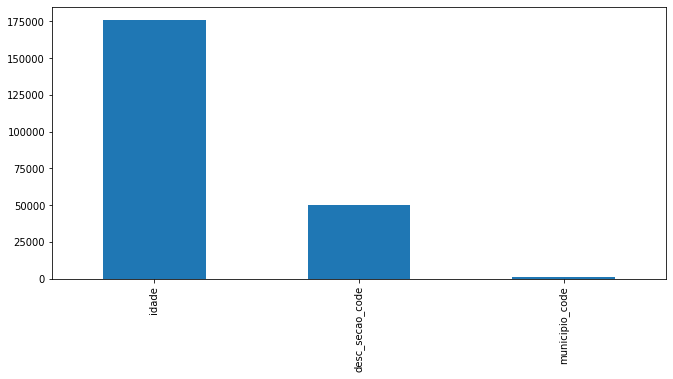

In [ ]:
chi2 = chi2_s.sort_values(ascending=False).plot.bar(figsize=(11,5))

#### Resume dataset best features chi2_score

In [ ]:
stat_data = df_chi2_s.describe(include='all').T
stat_data['nulos']= pd.DataFrame(best_df.isnull().sum())
stat_data['percent_nulos']= pd.DataFrame(df.isna().mean().round(4) * 100)
stat_data["type"] = pd.Series(df.dtypes)
stat_data["median"] = pd.Series(df.median(numeric_only=True))
stat_data["skewness"] = pd.Series(df.skew(numeric_only=True))
stat_data["kurtosis"] = pd.Series(df.kurt(numeric_only=True))
stat_data


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,nulos,percent_nulos,type,median,skewness,kurtosis
idade,703629.0,NaN,NaN,NaN,32.803985,10.848078,11.0,24.0,31.0,40.0,97.0,0.0,0.0,float64,31.0,0.686630,0.012228
desc_secao_code,703629.0,NaN,NaN,NaN,9.459154,4.804299,0.0,7.0,8.0,12.0,20.0,0.0,0.0,int64,8.0,0.537441,-0.454741
municipio_code,703629.0,NaN,NaN,NaN,2.239783,1.467692,0.0,1.0,3.0,4.0,4.0,0.0,0.0,int64,3.0,-0.084863,-1.562359
class_salario,703629.0,2.0,1.0,370181.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,category,NaN,NaN,NaN
class_salario_target,703629.0,NaN,NaN,NaN,0.526103,0.499319,0.0,0.0,1.0,1.0,1.0,NaN,0.0,int64,1.0,-0.104553,-1.989074


# Criando Train e Test groups do dataset [Features e Target] para aplicar

In [ ]:
df_chi2_s.columns
df= df_chi2_s

In [ ]:
X_train_columns = df.columns[0:-2]
target = 'class_salario'

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
    df[X_train_columns],
    df[target], 
    random_state=0)
print("Dados treino {}".format(X_train.shape))
print("Dados teste {}".format(X_test.shape))

Dados treino (527721, 3)
Dados teste (175908, 3)


In [ ]:
X_train[X_train_columns]

,idade,desc_secao_code,municipio_code
290305,44.0,4,1
453774,47.0,8,4
52945,21.0,8,1
523196,21.0,8,0
425795,20.0,8,4
...,...,...,...
147190,44.0,19,4
320349,40.0,8,0
248977,23.0,7,4
203273,36.0,8,1


# Regressão Logística

In [ ]:
XT = X_train[X_train_columns][:]
XTt = X_test[X_train_columns][:]
clf = LogisticRegression(random_state=0, max_iter=1000,C=3).fit(XT, y_train)
normal_train_resultado = clf.score(XT,y_train)
print("Score de Acuracia para todas caracteristicas [Treino]:",normal_train_resultado)
normal_test_resultado = clf.score(XTt,y_test)
print("Score de Acuracia para todas caracteristicas  [Teste]:",normal_test_resultado)

Score de Acuracia para todas caracteristicas [Treino]: 0.6422541456565117
Score de Acuracia para todas caracteristicas  [Teste]: 0.6426825385997226


# Probabilidade para cada classe


In [ ]:
import seaborn as sns
from sklearn import metrics
r_predict_proba = clf.predict_proba(X_test.iloc[:, :])
r_predict = clf.predict(X_test.iloc[:, :])
r_y_test = list(y_test)
r_inter = clf.intercept_

#Probabilidade (Predict_proba)
for i in range(len(r_predict)):
    print("""
    ValorReal=%s, Predicted=%s , 
    Predict_proba (no) =%s , Predict_proba (yes) =%s """ %(r_y_test[i], r_predict[i],round(r_predict_proba[i][0], 4),round(r_predict_proba[i][1], 4)))
    

A saída de streaming foi truncada nas últimas 5000 linhas.
    ValorReal=1, Predicted=1 , 
    Predict_proba (no) =0.2803 , Predict_proba (yes) =0.7197 

    ValorReal=1, Predicted=1 , 
    Predict_proba (no) =0.4318 , Predict_proba (yes) =0.5682 

    ValorReal=0, Predicted=0 , 
    Predict_proba (no) =0.7224 , Predict_proba (yes) =0.2776 

    ValorReal=1, Predicted=0 , 
    Predict_proba (no) =0.6695 , Predict_proba (yes) =0.3305 

    ValorReal=0, Predicted=0 , 
    Predict_proba (no) =0.5302 , Predict_proba (yes) =0.4698 

    ValorReal=1, Predicted=0 , 
    Predict_proba (no) =0.7208 , Predict_proba (yes) =0.2792 

    ValorReal=0, Predicted=1 , 
    Predict_proba (no) =0.4424 , Predict_proba (yes) =0.5576 

    ValorReal=0, Predicted=0 , 
    Predict_proba (no) =0.5345 , Predict_proba (yes) =0.4655 

    ValorReal=0, Predicted=1 , 
    Predict_proba (no) =0.4168 , Predict_proba (yes) =0.5832 

    ValorReal=1, Predicted=1 , 
    Predict_proba (no) =0.1075 , Predict_proba (yes) =

# Matriz de Confusão


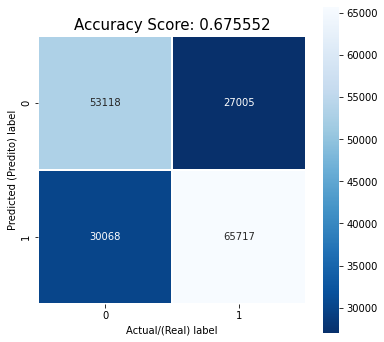

In [ ]:
CM = metrics.confusion_matrix(r_y_test, r_predict)
plt.figure(figsize=(6,6))
sns.heatmap(CM.T, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.xlabel('Actual/(Real) label');
plt.ylabel('Predicted (Predito) label');
all_sample_title = 'Accuracy Score: %.6f' % (normal_test_resultado)
plt.title(all_sample_title, size = 15);
plt.savefig('logistic_results.png')

In [ ]:
# Cross Validation Classification LogLoss
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
kfold = model_selection.KFold(n_splits=2, random_state=0, shuffle=True)
model = clf
scoring = 'accuracy'
results = model_selection.cross_val_score(model, XT, y_train, cv=kfold, scoring=scoring)
print("accuracy: %.3f (%.3f)" % (results.mean(), results.std()))
test_size = 0.33
model.fit(XT, y_train)
predicted_d = model.predict(XTt)
matrix = confusion_matrix(y_test, predicted_d)
report = classification_report(y_test, predicted_d)
print("=============== Report ================== ")
print(report)
print("=============== Report ================== ")

accuracy: 0.661 (0.001)
=============== Report ================== 
              precision    recall  f1-score   support

           0       0.66      0.67      0.66    134429
           1       0.66      0.65      0.66    134472

    accuracy                           0.66    268901
   macro avg       0.66      0.66      0.66    268901
weighted avg       0.66      0.66      0.66    268901

=============== Report ================== 
